In [1]:
import meals as ml
import tools as tl
import paths
from preprocessing import read_csv_clean

In [2]:
fent_meal_count = []
for path in paths.reversal_fent:
    test = read_csv_clean(path)
    avg = round(len(ml.find_meals(test)) / ml.experiment_duration(test), 2)
    fent_meal_count.append(avg)
fent_meal_count

[20.11, 0.0, 17.45, 40.51, 15.46]

In [3]:
veh_meal_count = []
for path in paths.reversal_veh:
    test = read_csv_clean(path)
    avg = round(len(ml.find_meals(test)) / ml.experiment_duration(test), 2)
    veh_meal_count.append(avg)
veh_meal_count

[21.29, 28.96, 19.51, 11.64, 12.74]

/Users/yaomingyang/Desktop/FED3-data/behavior data integrated/mPFC/Fentanyl Tx/Reversal/M1.CSV


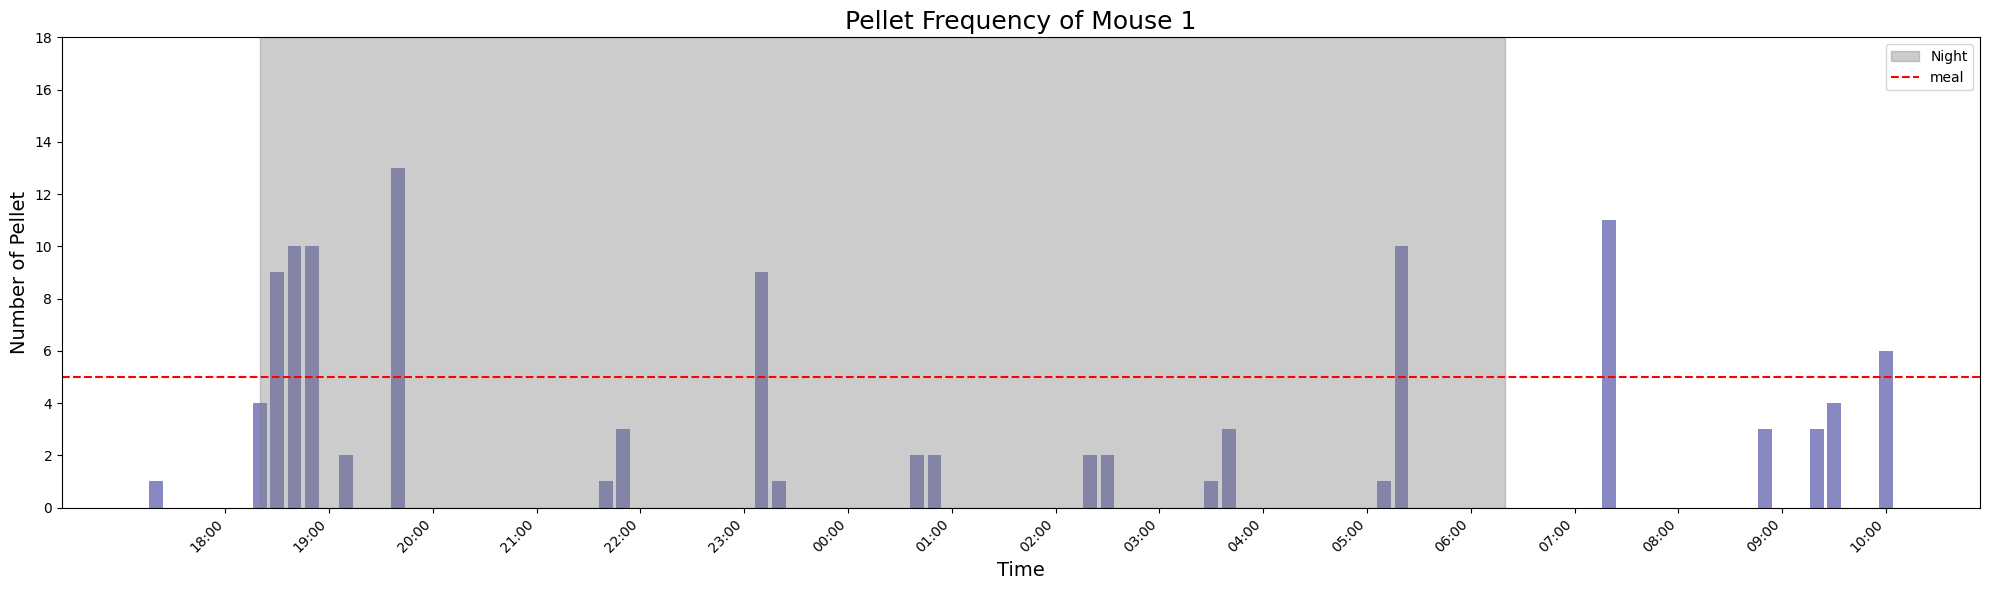

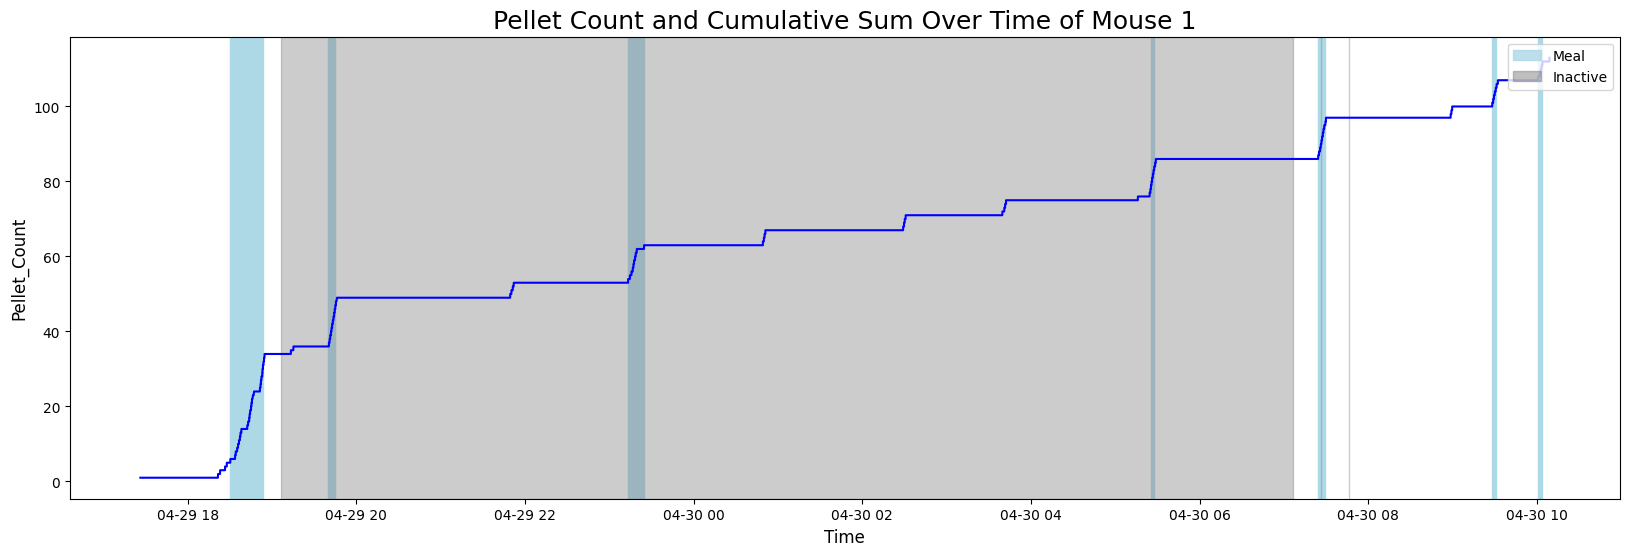

/Users/yaomingyang/Desktop/FED3-data/behavior data integrated/mPFC/Fentanyl Tx/Reversal/M2.CSV


/Users/yaomingyang/Desktop/FED3-data/meals.py:39: RuntimeWarning: divide by zero encountered in divide
  return round(total_pellet / total_hr, 3)


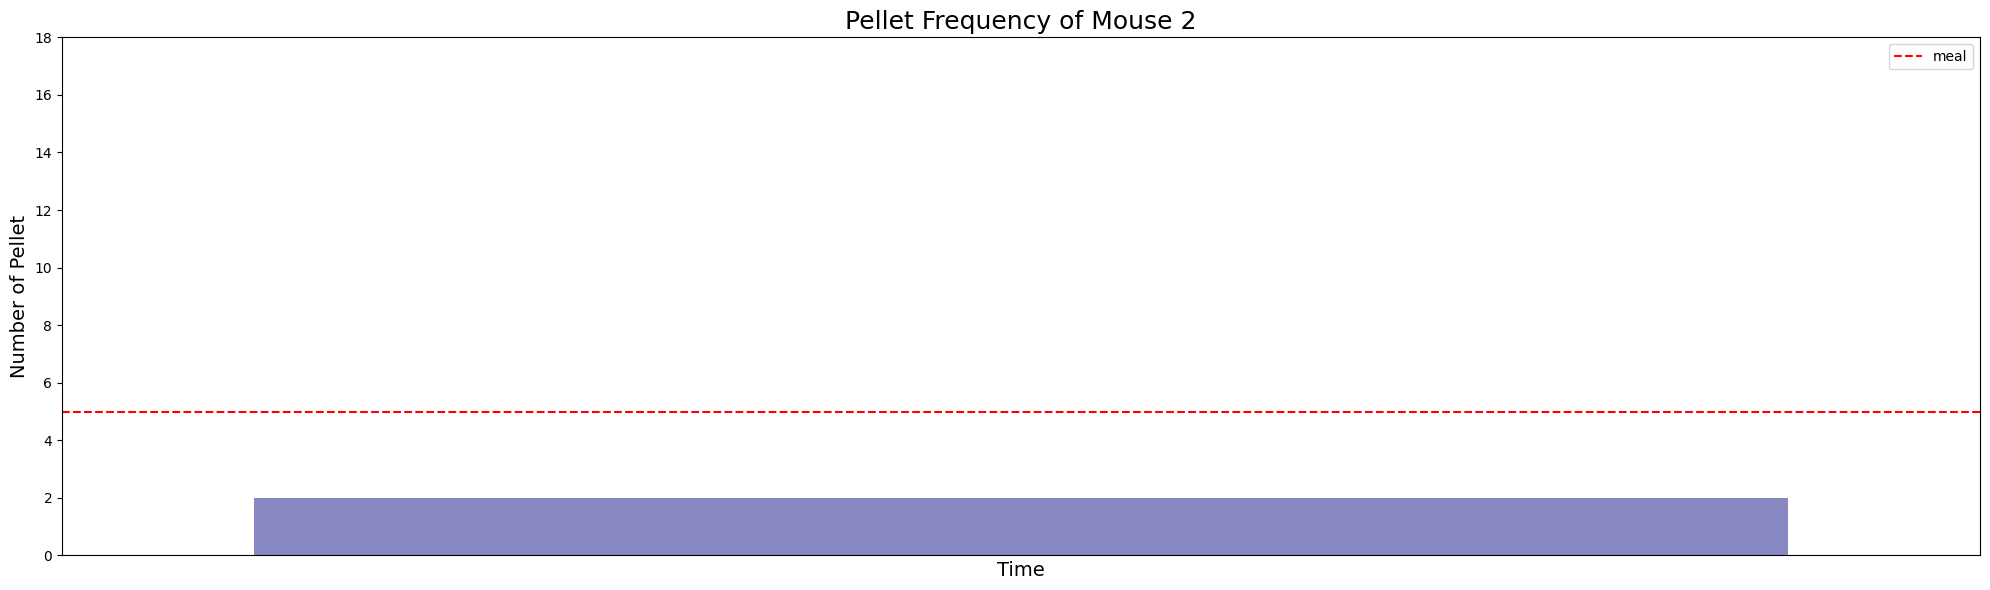

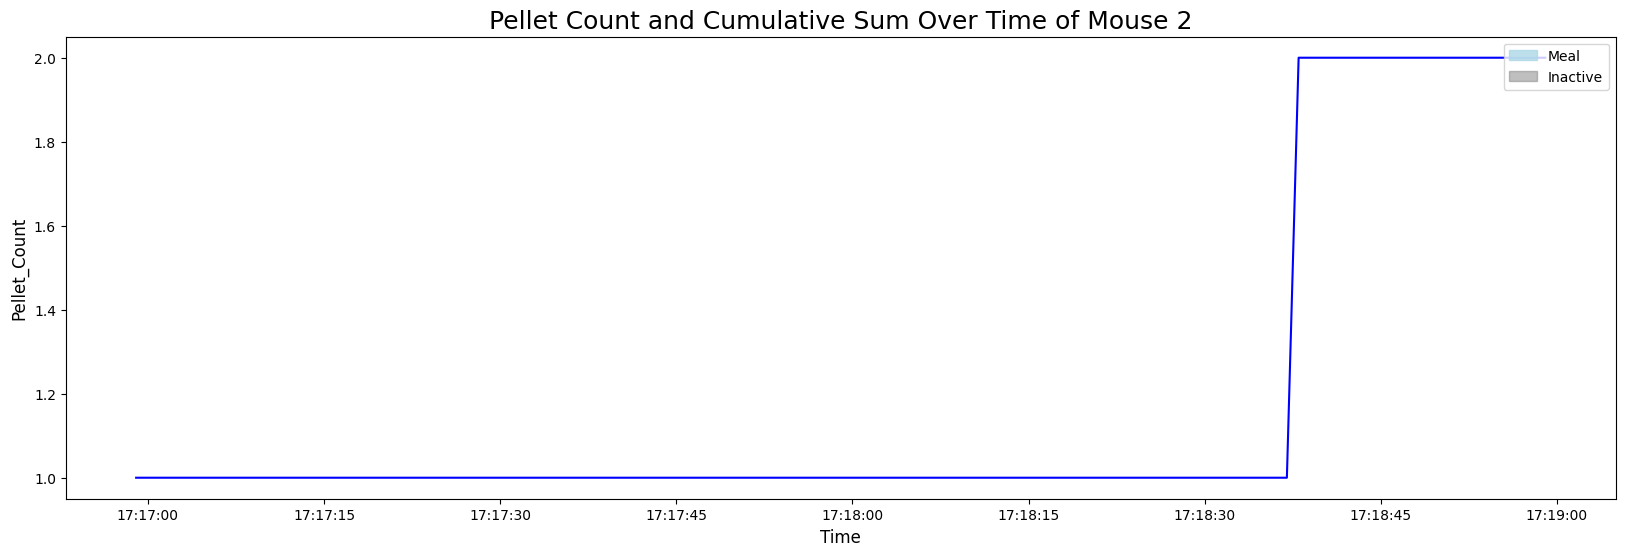

/Users/yaomingyang/Desktop/FED3-data/behavior data integrated/mPFC/Fentanyl Tx/Reversal/M3.csv


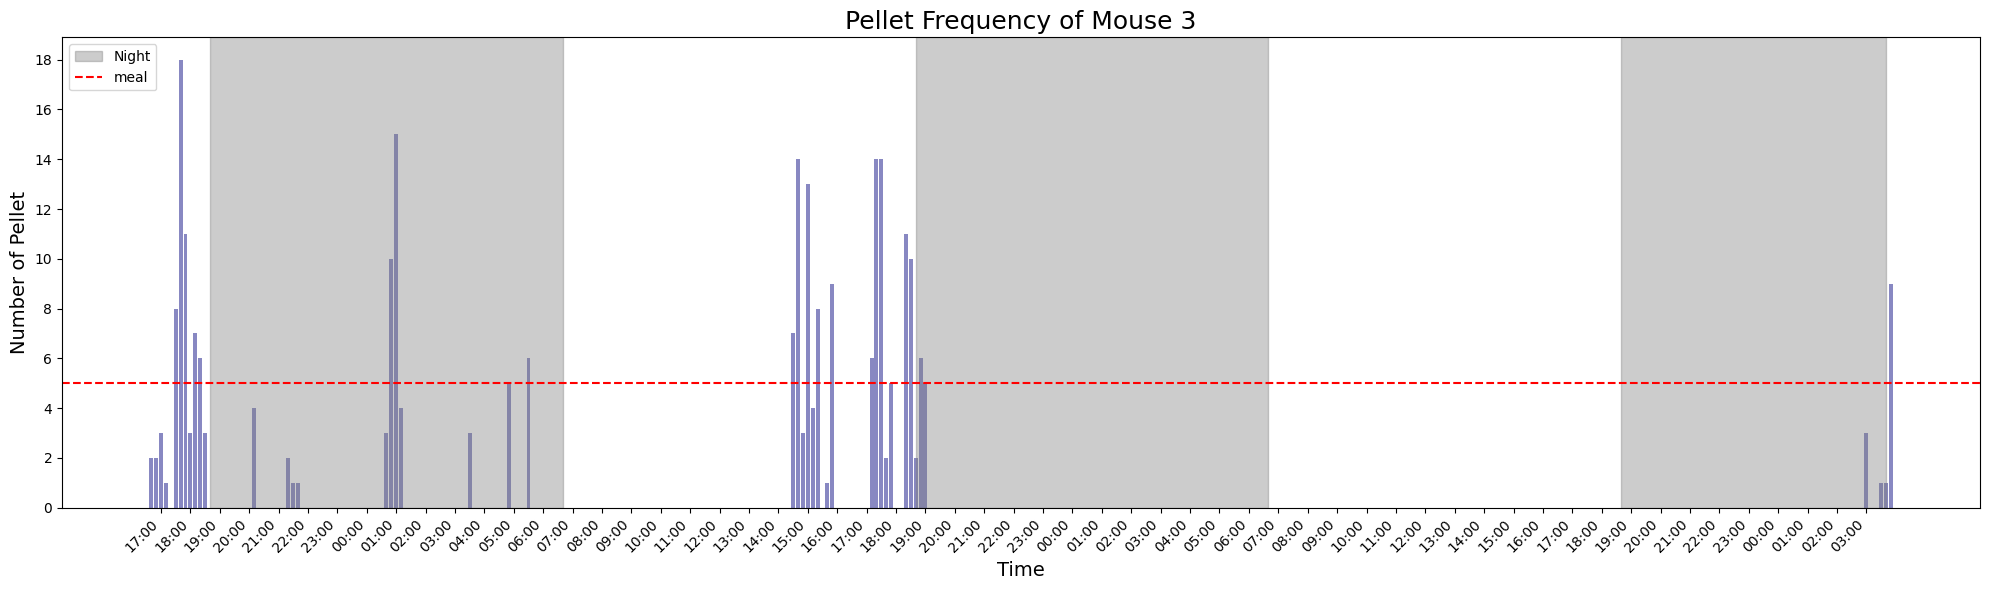

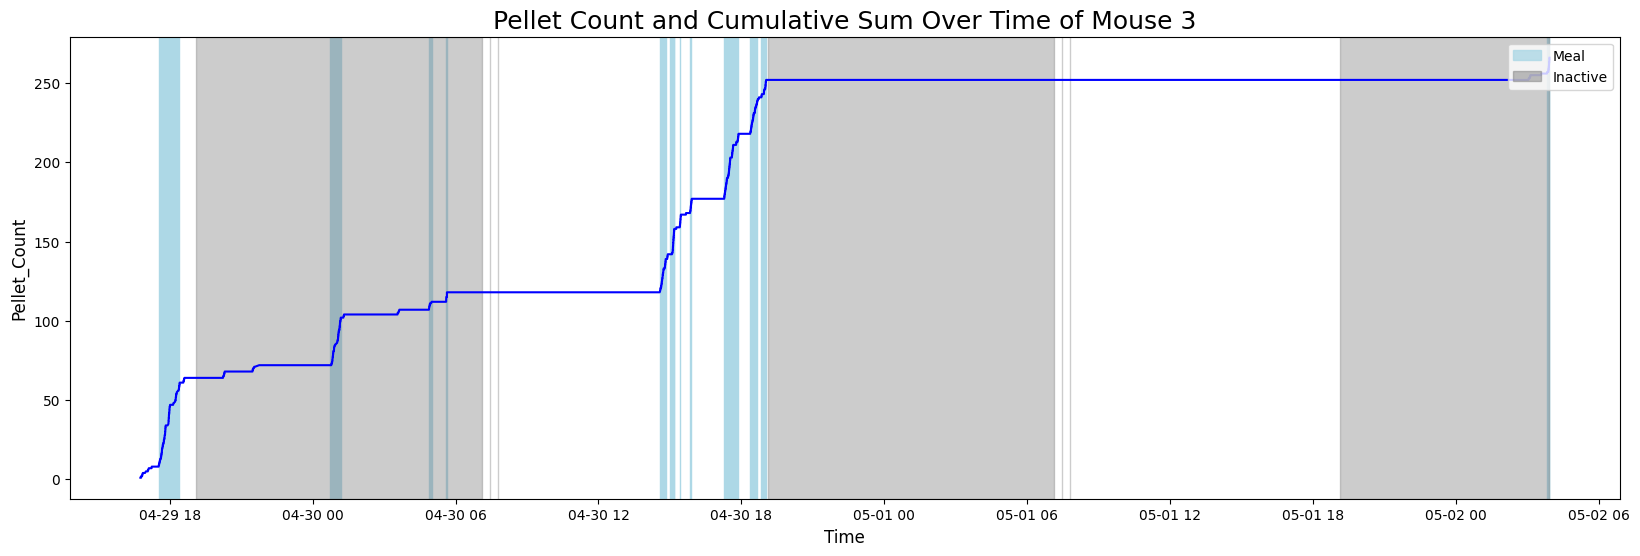

/Users/yaomingyang/Desktop/FED3-data/behavior data integrated/mPFC/Fentanyl Tx/Reversal/M4.CSV


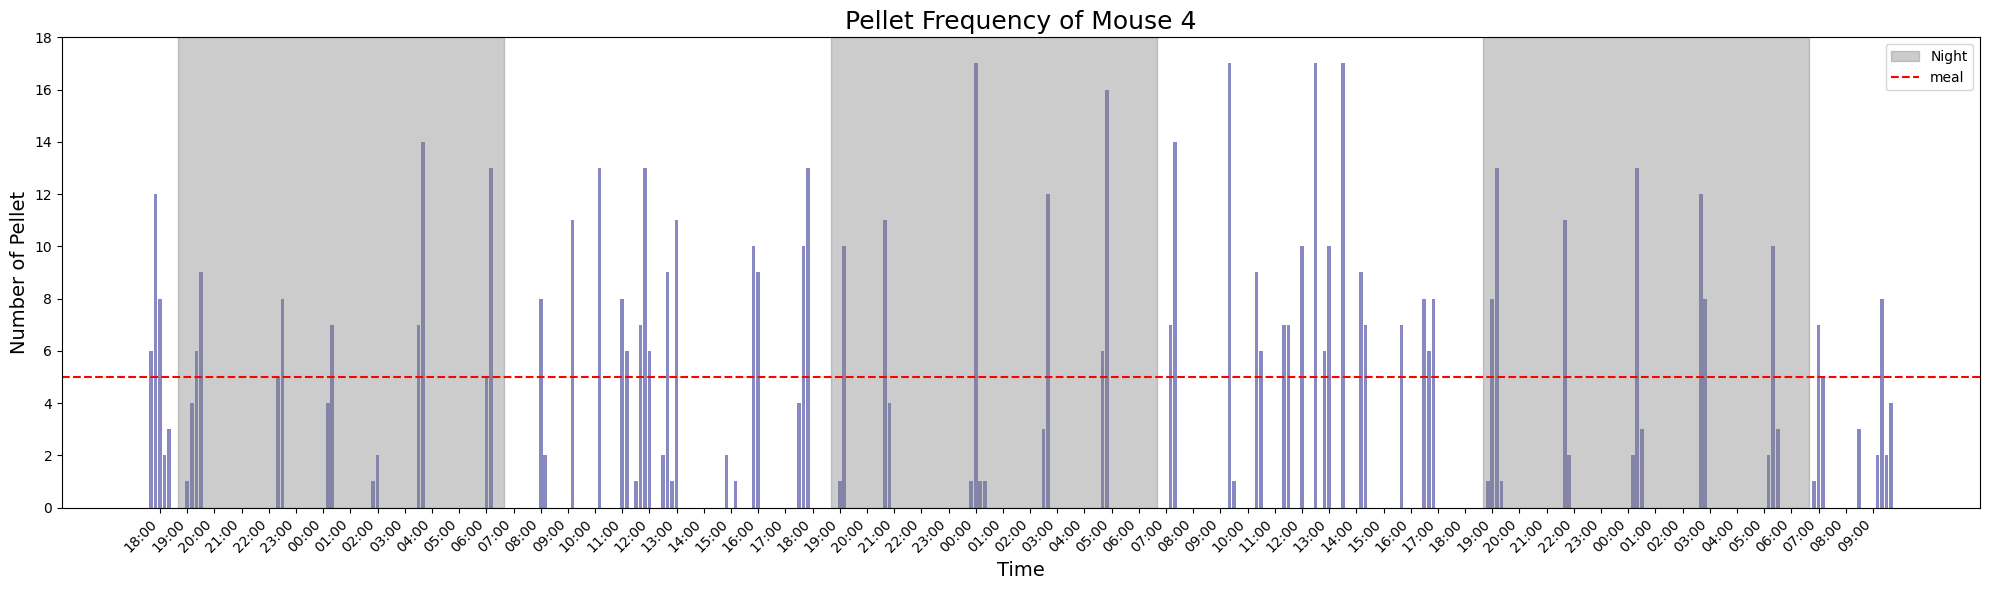

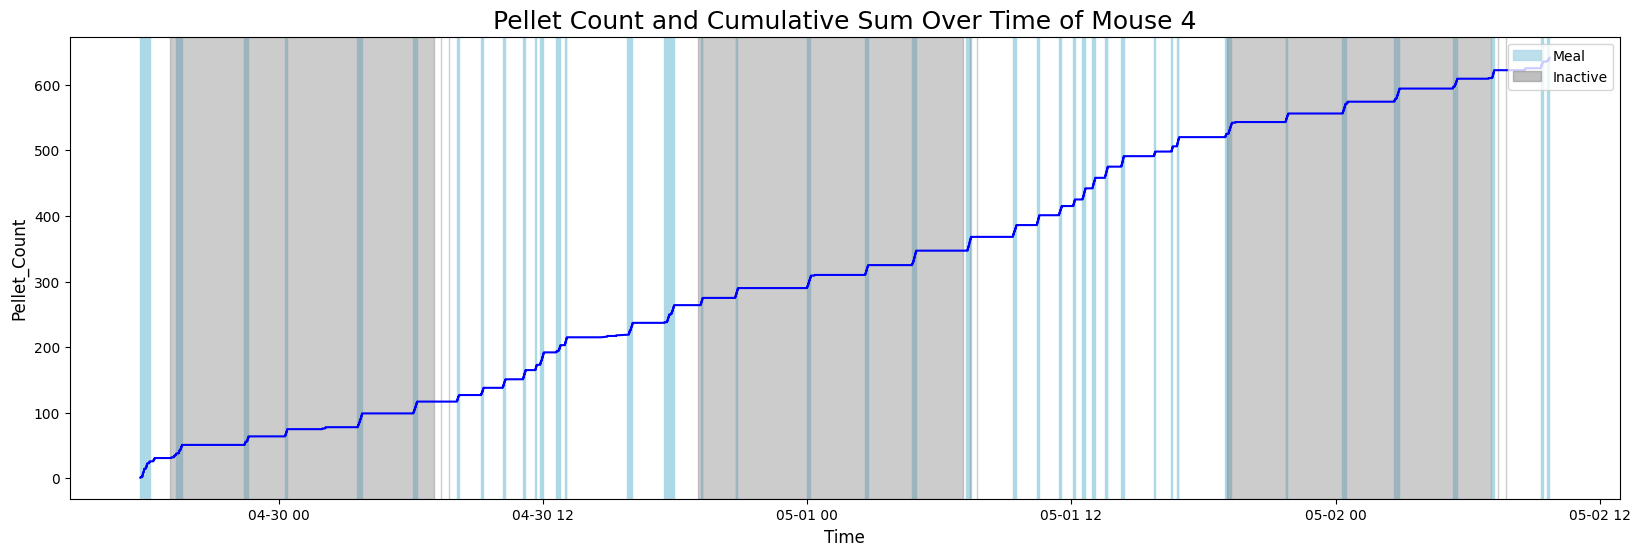

/Users/yaomingyang/Desktop/FED3-data/behavior data integrated/mPFC/Fentanyl Tx/Reversal/M5.CSV


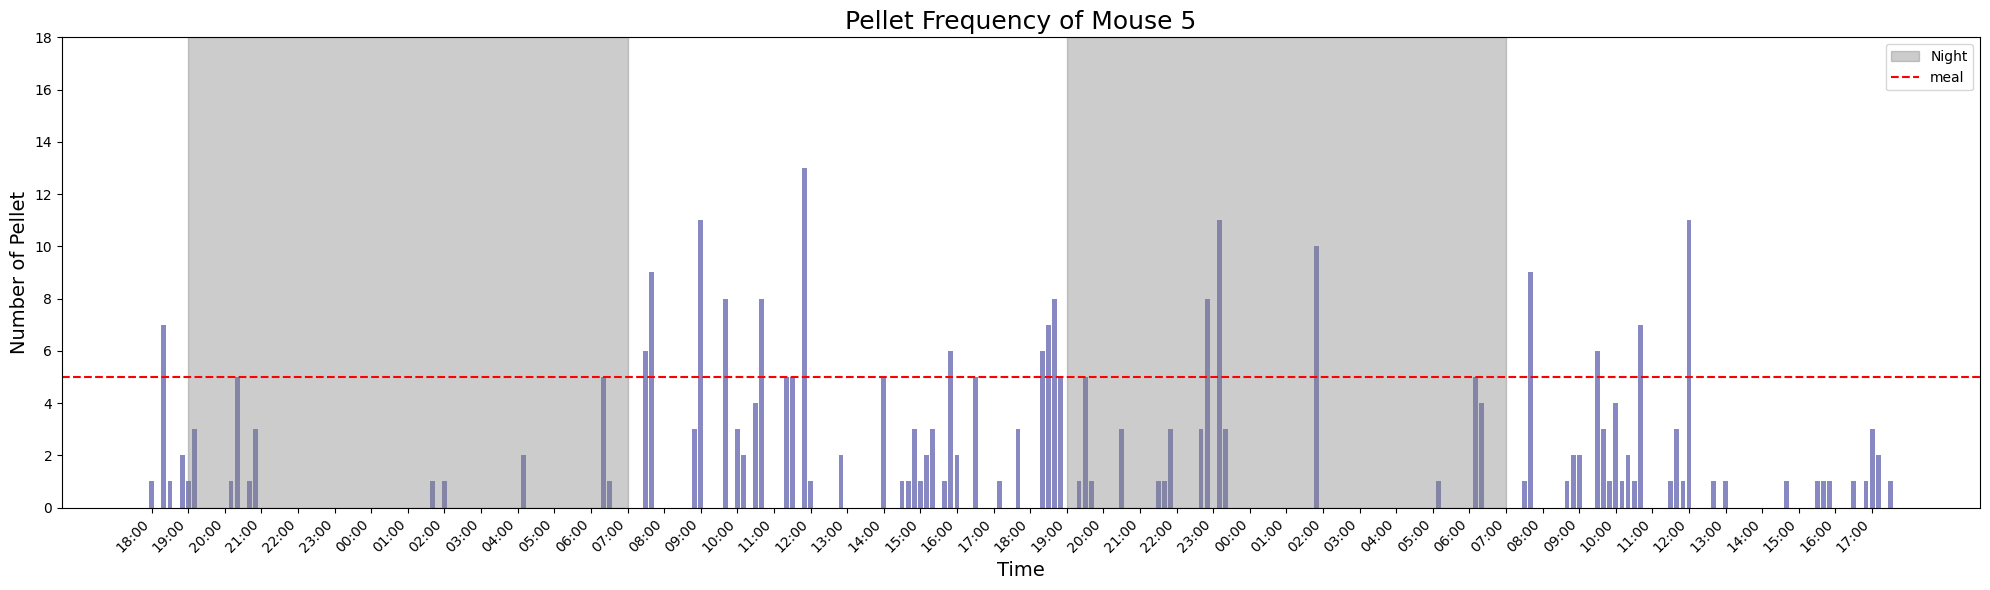

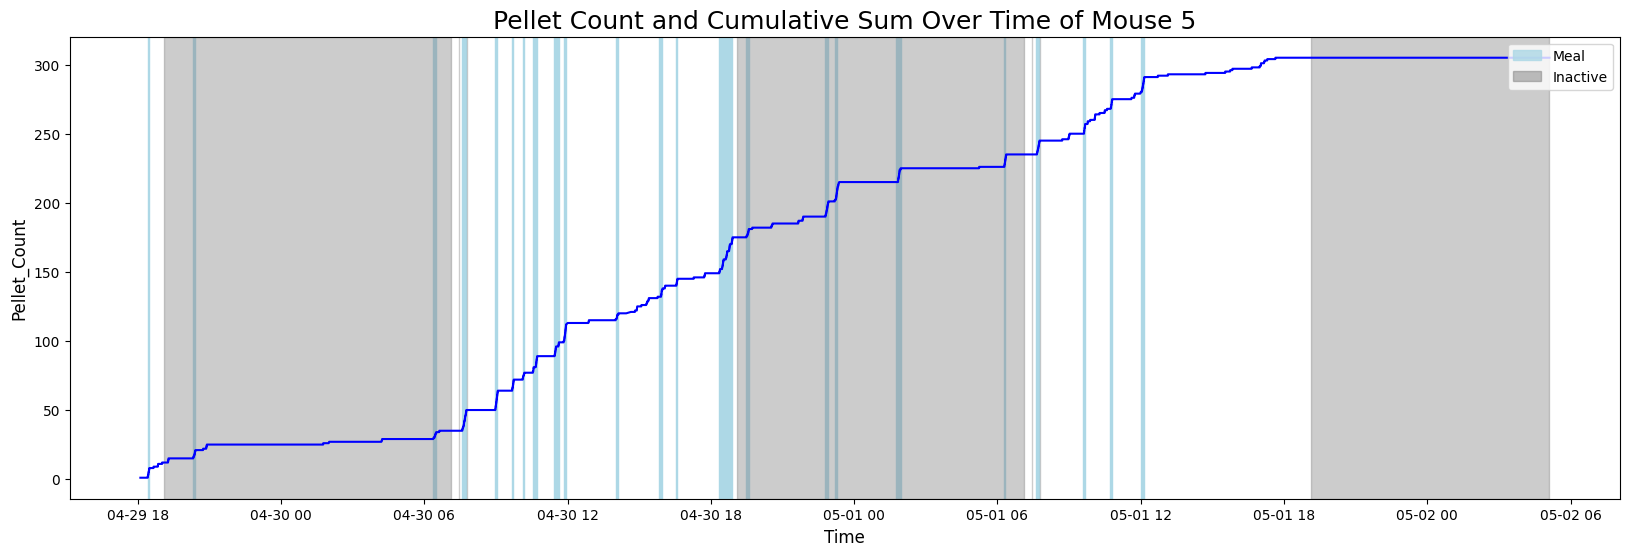

In [5]:
fent_avg_pellet = [] # pellet per hour
fent_dark_meals = [] # percentage of meals in inactive/dark phase
for path in paths.reversal_fent:
    print(path)
    data = read_csv_clean(path)
    meal = ml.find_meals(data)
    group = ml.pellet_flip(data)
    num = tl.get_bhv_num(path)
    fent_avg_pellet.append(ml.average_pellet(group))
    fent_dark_meals.append(ml.active_meal(meal))
    ml.graph_pellet_frequency(group, None, num[0])
    ml.graphing_cum_count(data, meal, None, num[0], flip=True)

/Users/yaomingyang/Desktop/FED3-data/behavior data integrated/mPFC/Vehicle Tx/Reversal/M10.CSV


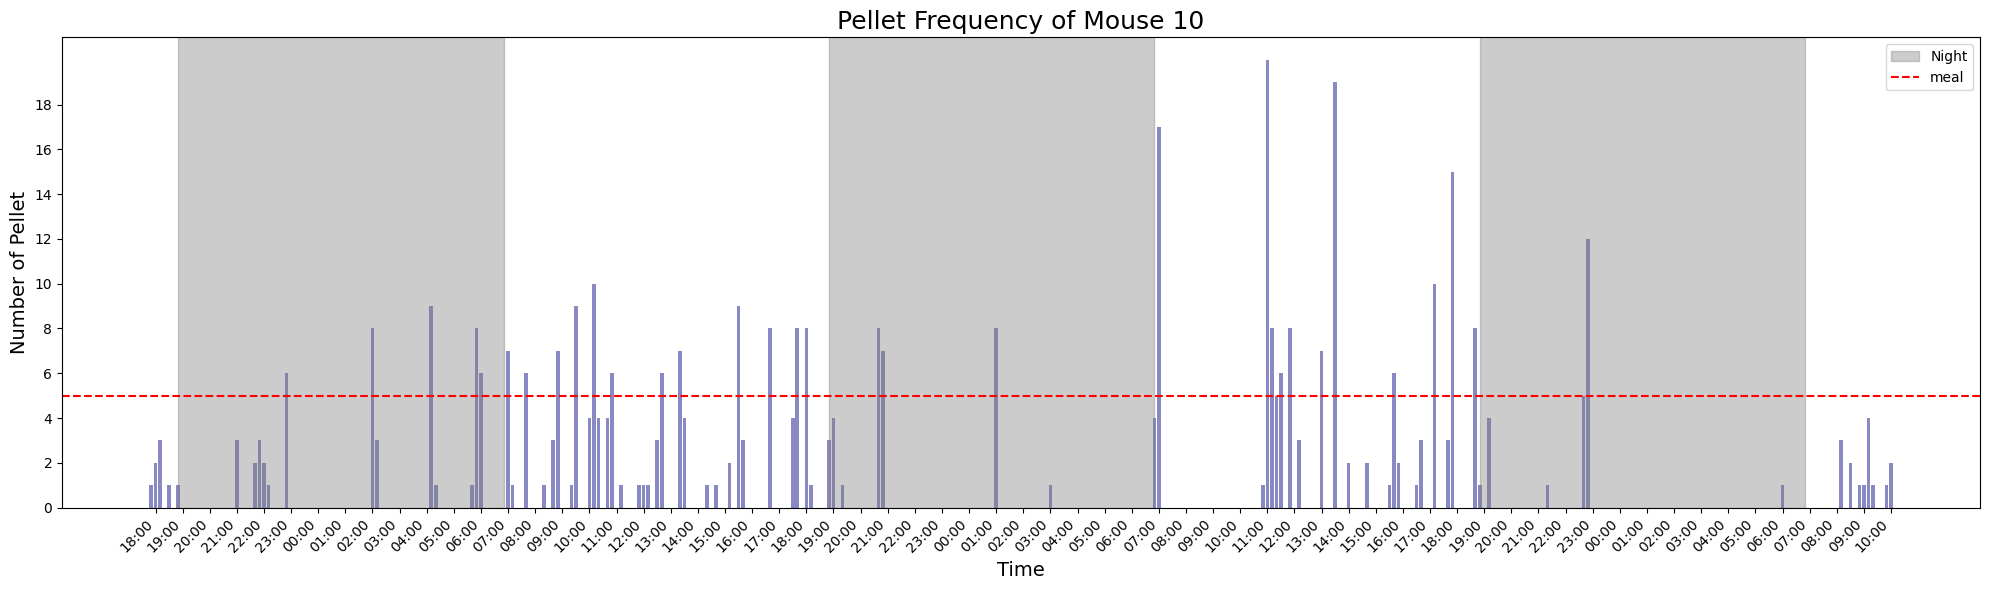

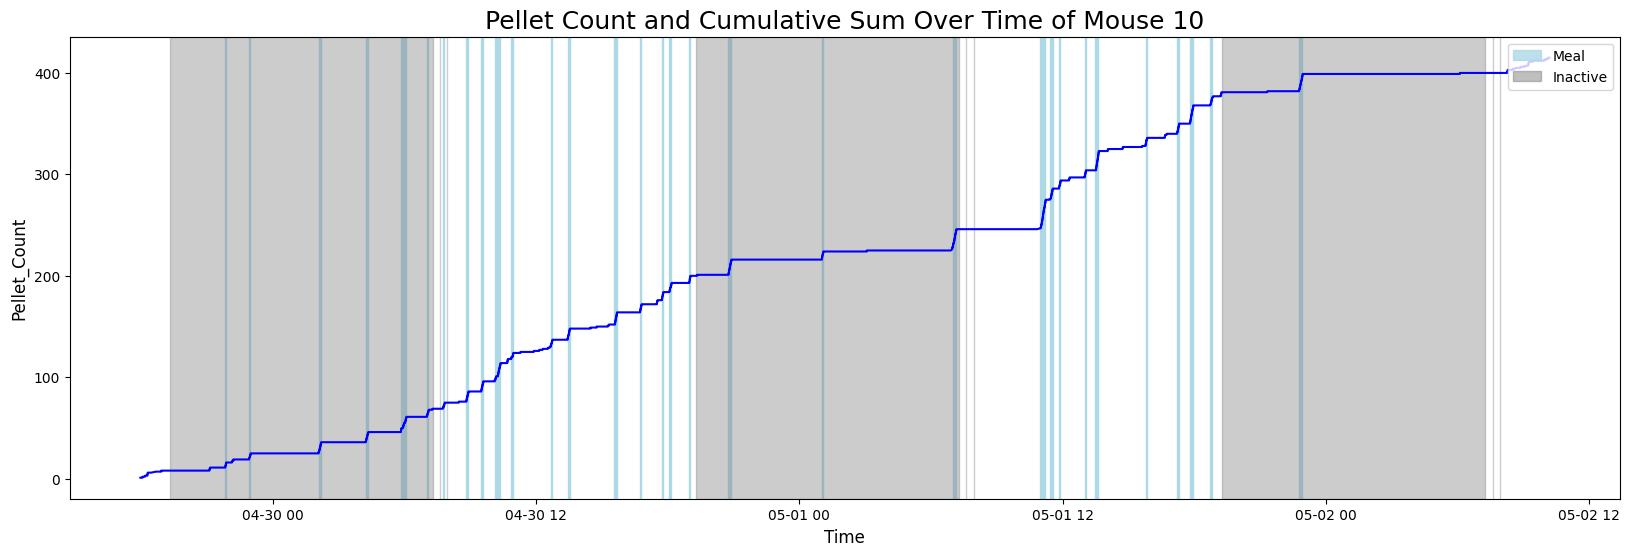

/Users/yaomingyang/Desktop/FED3-data/behavior data integrated/mPFC/Vehicle Tx/Reversal/M6.csv


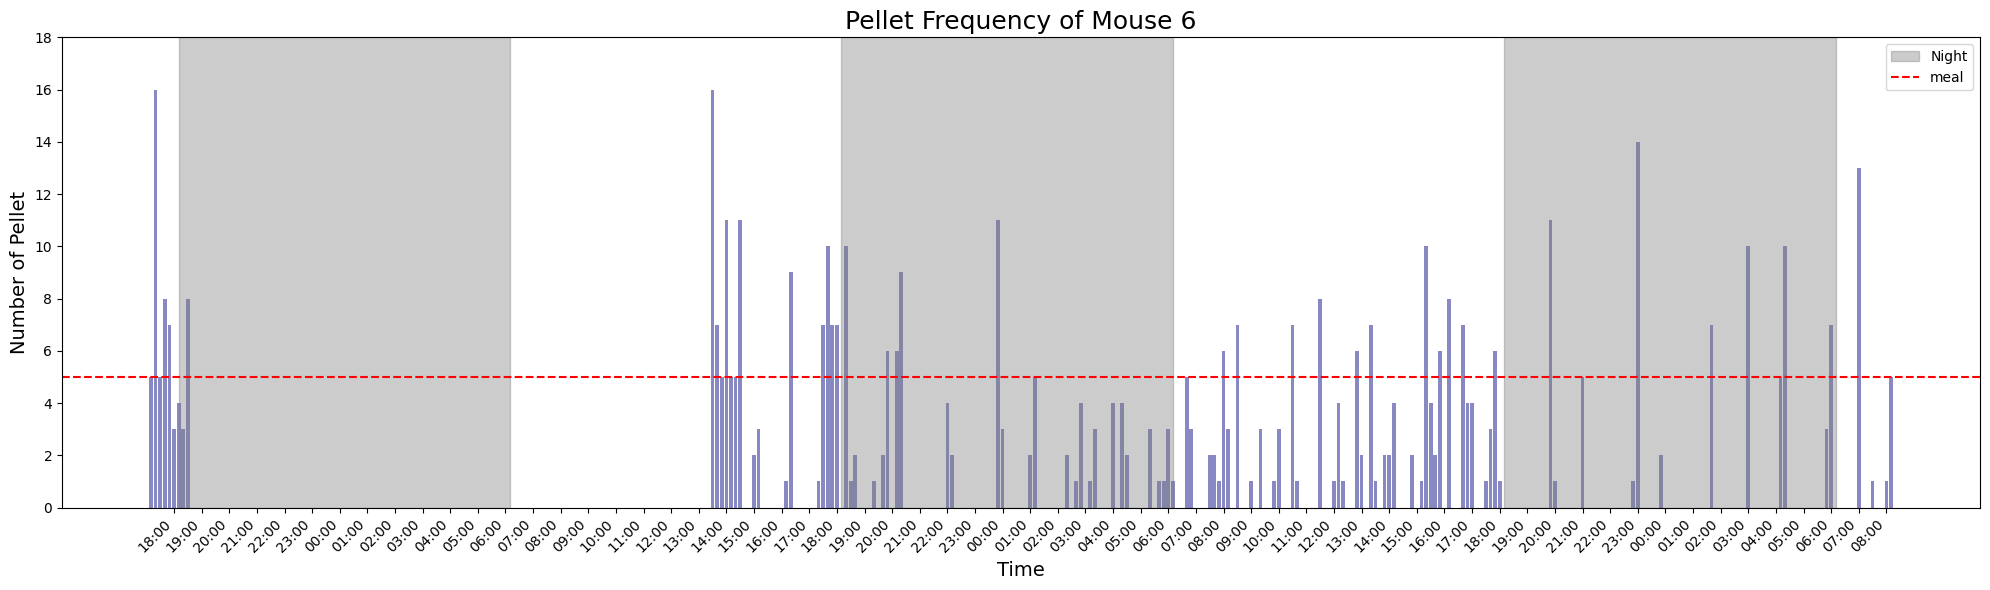

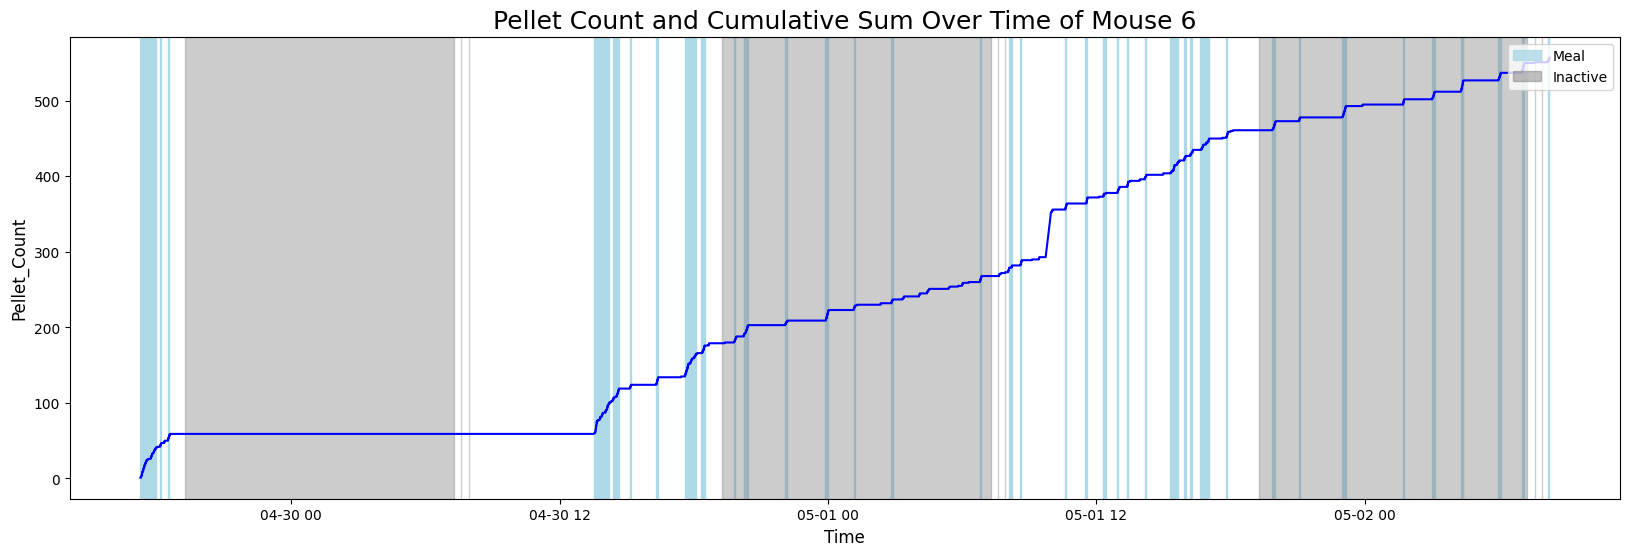

/Users/yaomingyang/Desktop/FED3-data/behavior data integrated/mPFC/Vehicle Tx/Reversal/M7.CSV


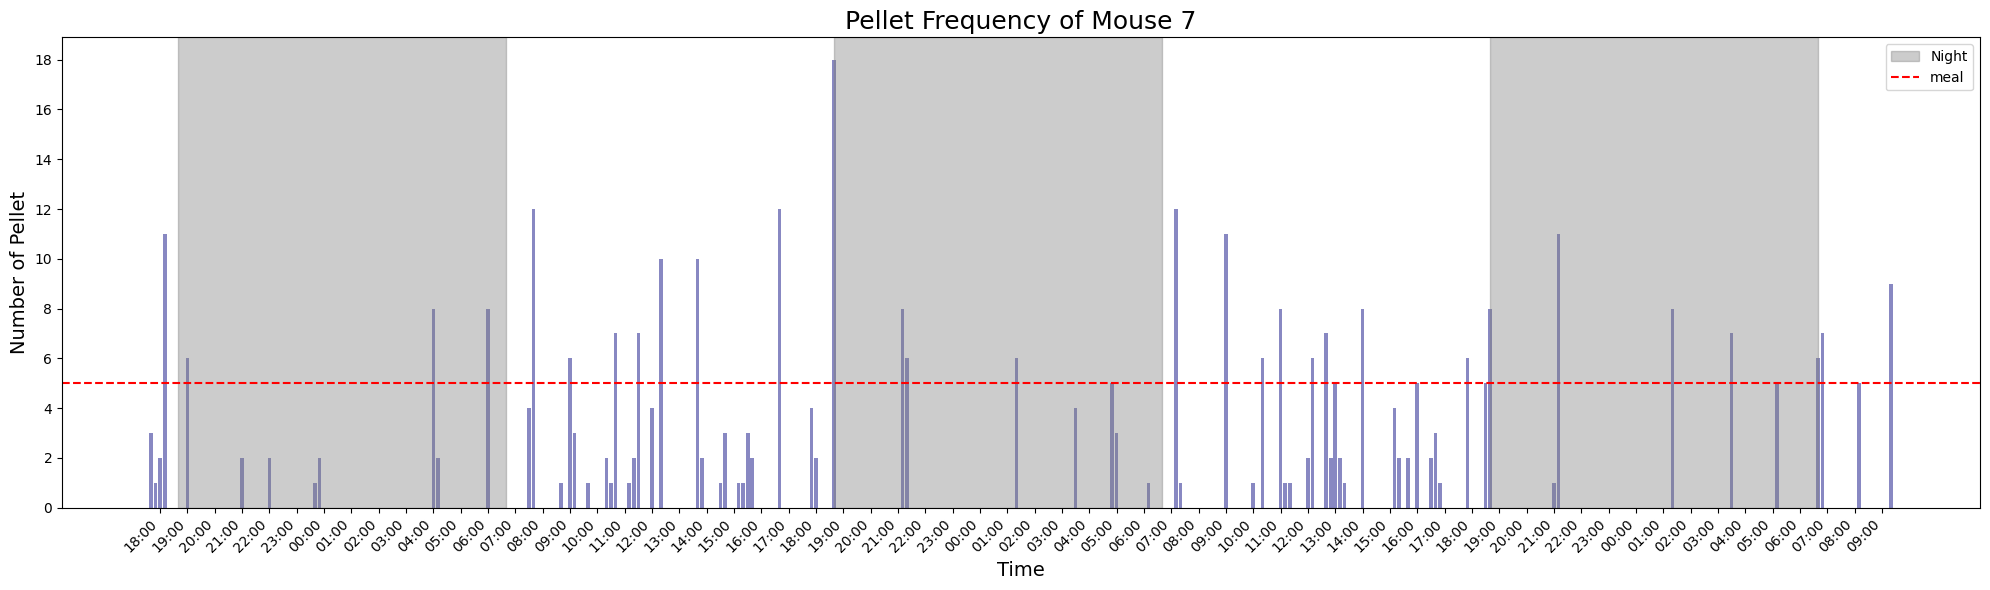

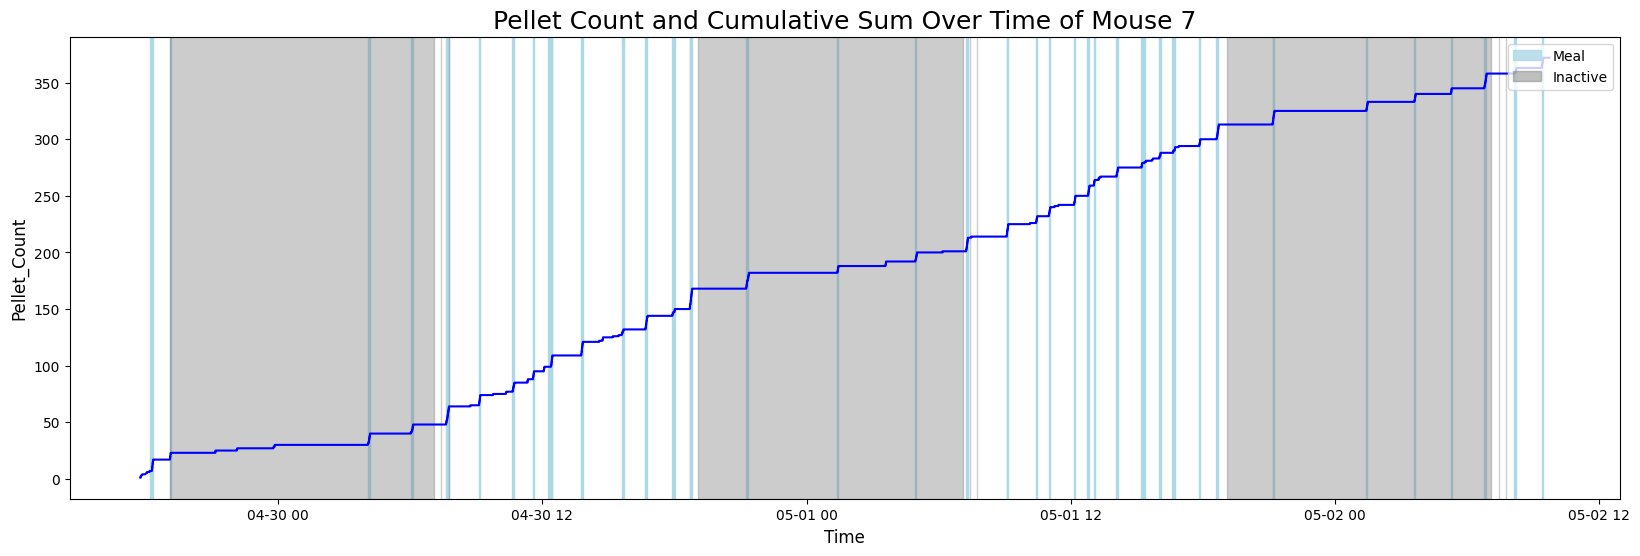

/Users/yaomingyang/Desktop/FED3-data/behavior data integrated/mPFC/Vehicle Tx/Reversal/M8.CSV


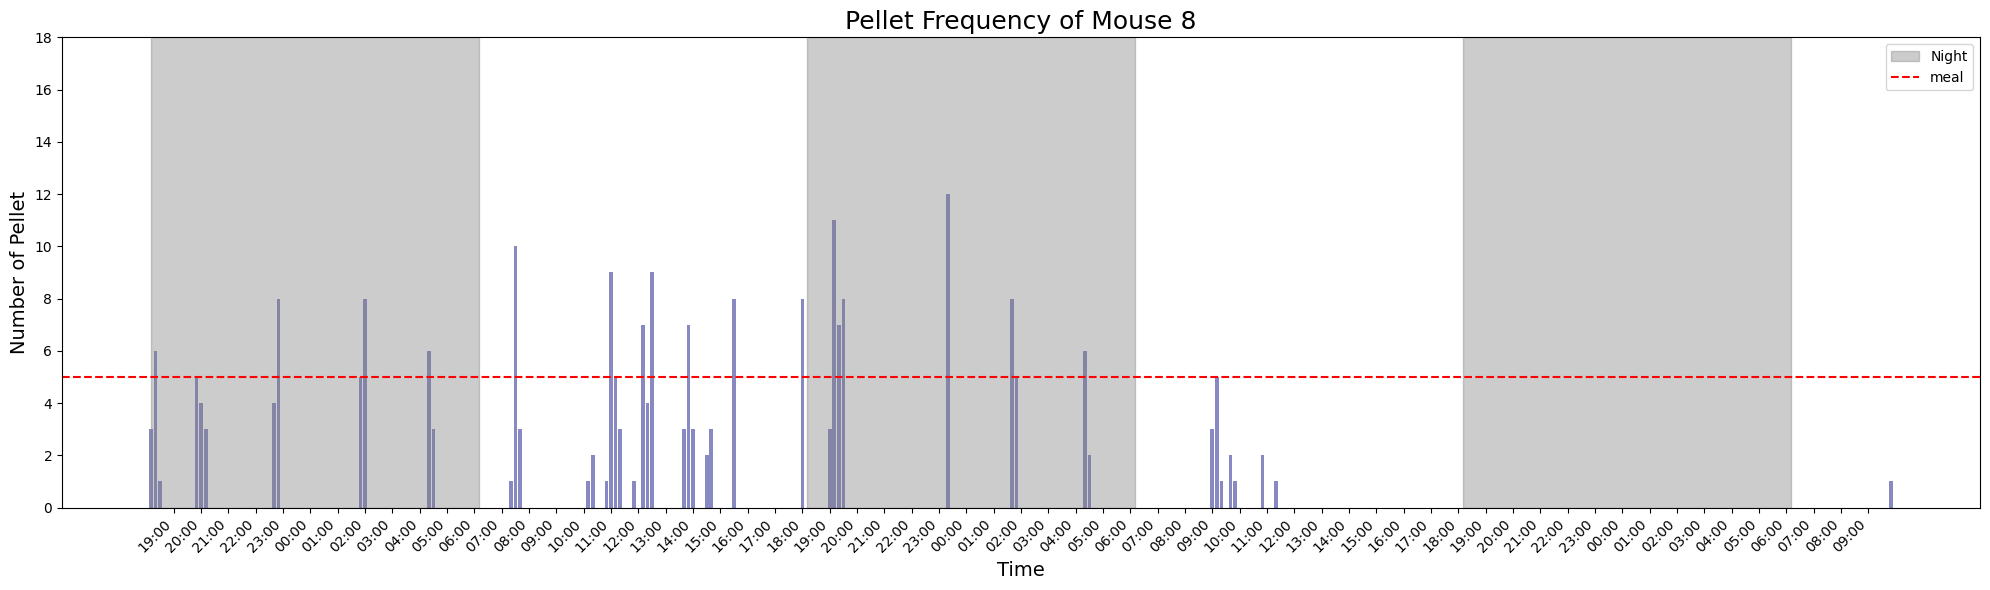

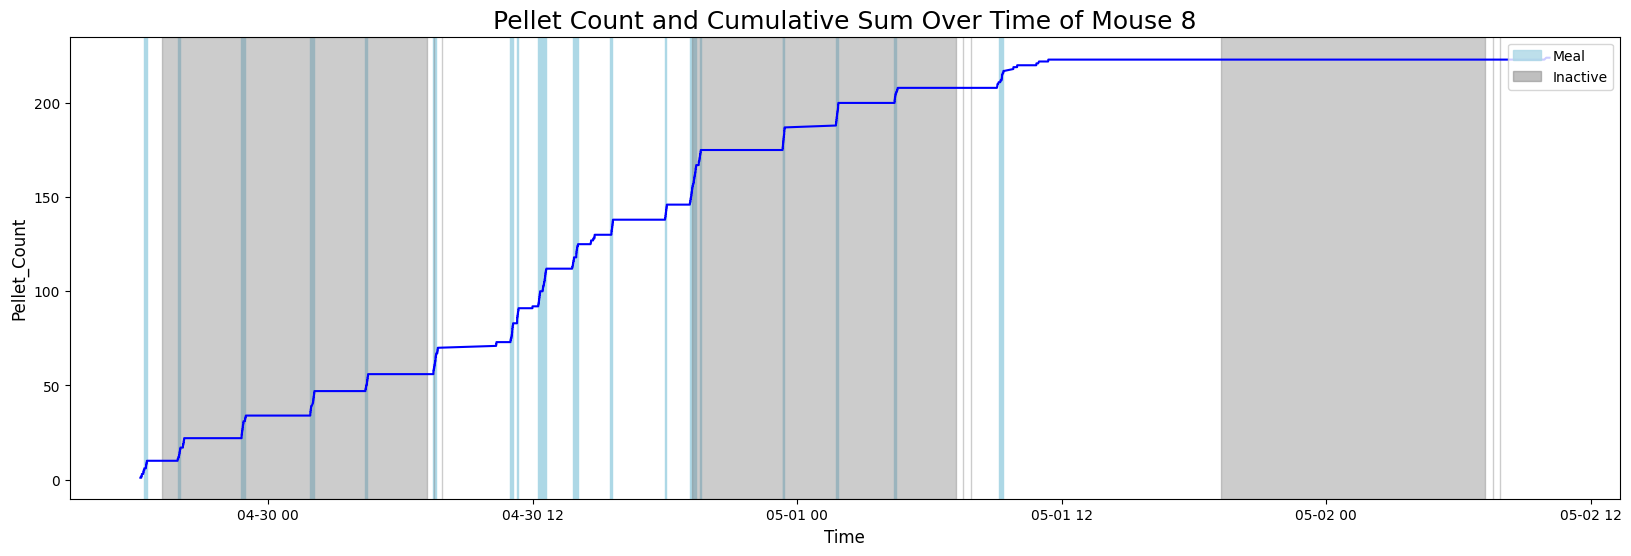

/Users/yaomingyang/Desktop/FED3-data/behavior data integrated/mPFC/Vehicle Tx/Reversal/M9.CSV


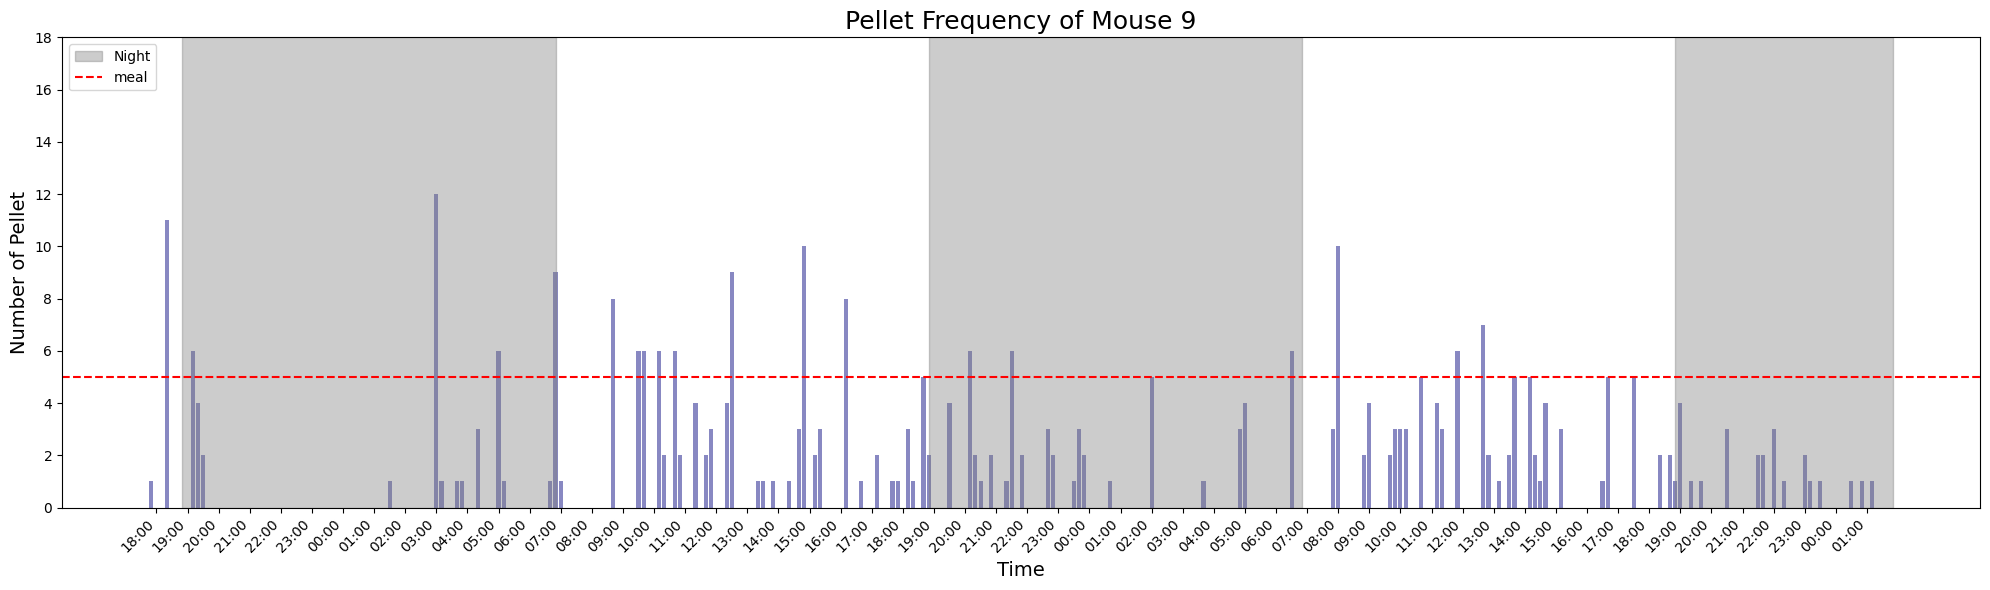

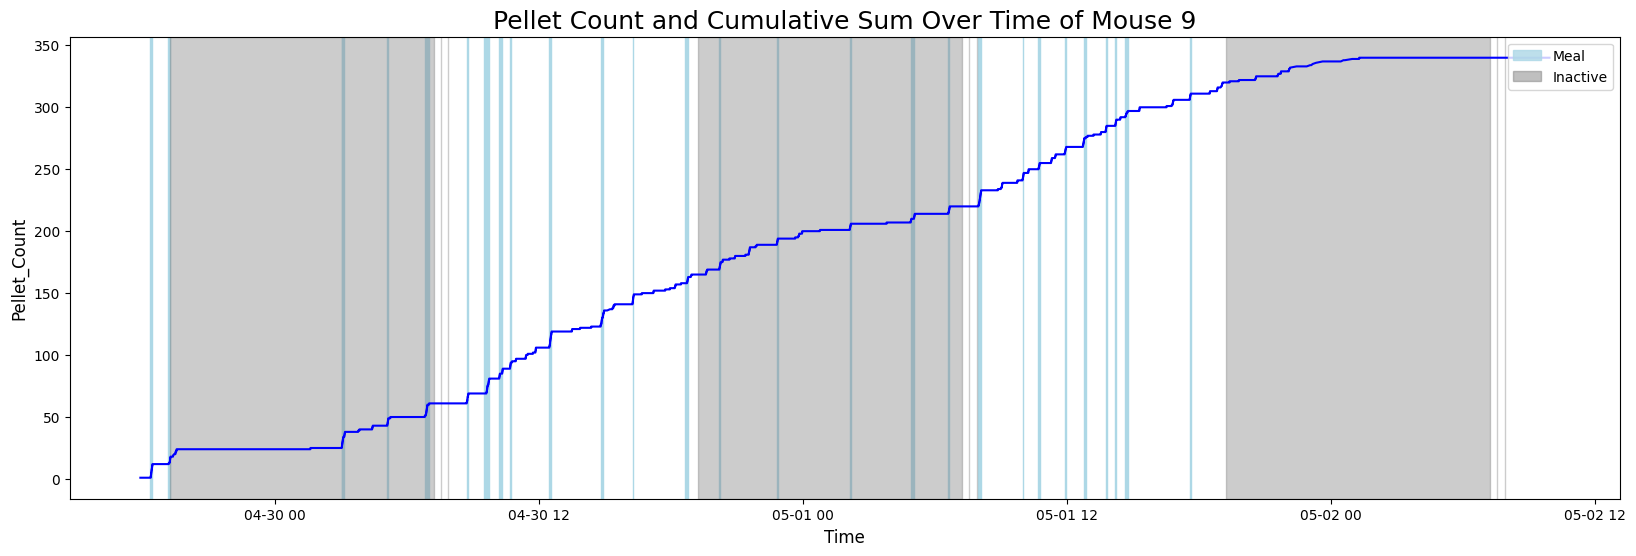

In [7]:
veh_avg_pellet = [] # pellet per hour
veh_dark_meals = [] # percentage of meals in inactive/dark phase
for path in paths.reversal_veh:
    print(path)
    data = read_csv_clean(path)
    meal = ml.find_meals(data)
    group = ml.pellet_flip(data)
    num = tl.get_bhv_num(path)[0]
    veh_avg_pellet.append(ml.average_pellet(group))
    veh_dark_meals.append(ml.active_meal(meal))
    ml.graph_pellet_frequency(group, None, num)
    ml.graphing_cum_count(data, meal, None, num, flip=True)

In [8]:
fent_dark_meals, veh_dark_meals

([0.3571, 0, 0.2326, 0.3981, 0.2632], [0.2982, 0.3158, 0.2885, 0.5161, 0.3235])

In [9]:
fent_avg_pellet, veh_avg_pellet

([6.78, inf, 4.496, 10.016, 6.421], [6.468, 7.905, 5.843, 3.518, 6.145])

In [10]:
fent_avg_pellet.remove(fent_avg_pellet[1])
fent_avg_pellet

[6.78, 4.496, 10.016, 6.421]

Control Size: 5
Fentanyl Size: 4
Control Average: 5.9758000000000004
Fentanyl Average: 6.92825
Control Standard Deviation: 1.5851749745690538
Fentanyl Standard Deviation: 2.2897831593115243


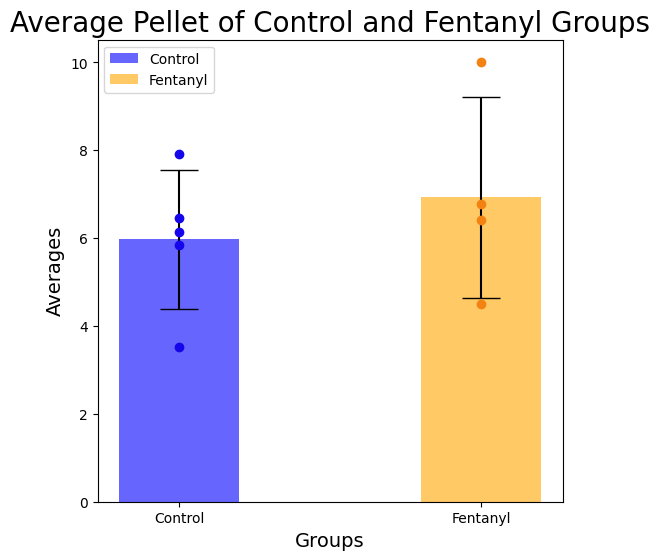

In [11]:
ml.graph_average_pellet(veh_avg_pellet, fent_avg_pellet, exp_name='Fentanyl')